In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from pycaret.classification import *

In [16]:
df=pd.read_csv("d:/Mini Project/Github/Fraud Transaction/Data/Fraud.csv")

In [17]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            6362620 non-null  int64  
 1   type            6362620 non-null  object 
 2   amount          6362620 non-null  float64
 3   nameOrig        6362620 non-null  object 
 4   oldbalanceOrg   6362620 non-null  float64
 5   newbalanceOrig  6362620 non-null  float64
 6   nameDest        6362620 non-null  object 
 7   oldbalanceDest  6362620 non-null  float64
 8   newbalanceDest  6362620 non-null  float64
 9   isFraud         6362620 non-null  int64  
 10  isFlaggedFraud  6362620 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


As mention in dataset description, the each of this recepients account have their own type that start either C (customer account) or M (merchant account). We also one hot encoded type of transaction to be further analyze below.

In [28]:
df["TypeOfCustomer"]= df["nameDest"].apply(lambda nameDest : nameDest[0])
one_hot = pd.get_dummies(df["TypeOfCustomer"])
df = df.drop('TypeOfCustomer',axis = 1)

df = df.join(one_hot)

one_hot = pd.get_dummies(df["type"])
df = df.drop('type',axis = 1)

df = df.join(one_hot)

df

ValueError: columns overlap but no suffix specified: Index(['C', 'M'], dtype='object')

In [30]:
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,C,M,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
step,1.000000,0.022379,-0.010064,-0.010305,0.027674,0.025896,0.031482,-0.005015,0.005015,0.004067,-0.012986,0.002864,0.005015,0.006913
amount,0.022379,1.000000,-0.002856,-0.007958,0.294071,0.459260,0.076786,0.197233,-0.197233,-0.009812,-0.004643,-0.023298,-0.197233,0.365831
oldbalanceOrg,-0.010064,-0.002856,1.000000,0.998802,0.066156,0.041933,0.010179,0.189289,-0.189289,0.506699,-0.201207,-0.021378,-0.189289,-0.081703
newbalanceOrig,-0.010305,-0.007958,0.998802,1.000000,0.067724,0.041740,-0.008147,0.193718,-0.193718,0.527318,-0.211295,-0.021799,-0.193718,-0.087468
oldbalanceDest,0.027674,0.294071,0.066156,0.067724,1.000000,0.976564,-0.005900,0.231210,-0.231210,0.075926,0.085791,0.009260,-0.231210,0.130386
newbalanceDest,0.025896,0.459260,0.041933,0.041740,0.976564,1.000000,0.000530,0.238066,-0.238066,0.034787,0.093235,0.006272,-0.238066,0.191618
isFraud,0.031482,0.076786,0.010179,-0.008147,-0.005900,0.000530,1.000000,0.025644,-0.025644,-0.019096,0.011143,-0.002898,-0.025644,0.053926
C,-0.005015,0.197233,0.189289,0.193718,0.231210,0.238066,0.025644,1.000000,-1.000000,0.379177,0.526033,0.057542,-1.000000,0.215909
M,0.005015,-0.197233,-0.189289,-0.193718,-0.231210,-0.238066,-0.025644,-1.000000,1.000000,-0.379177,-0.526033,-0.057542,1.000000,-0.215909
CASH_IN,0.004067,-0.009812,0.506699,0.527318,0.075926,0.034787,-0.019096,0.379177,-0.379177,1.000000,-0.391708,-0.042848,-0.379177,-0.160776


In [31]:
df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,C,M,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
count,6353599.00,6353599.00,6353599.00,6353599.00,6353599.00,6353599.00,6353599.00,6353599.00,6353599.00,6353599.00,6353599.00,6353599.00,6353599.00,6353599.00
mean,243.40,180117.23,834784.47,856045.21,1102034.35,1226502.30,0.00,0.66,0.34,0.22,0.35,0.01,0.34,0.08
std,142.33,604248.72,2889811.22,2925641.68,3401219.09,3676342.81,0.04,0.47,0.47,0.41,0.48,0.08,0.47,0.28
min,1.00,63.84,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,13475.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,75196.91,14214.00,0.00,133831.25,215839.63,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,335.00,208960.08,107361.00,144464.76,944944.06,1113997.60,0.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00
max,743.00,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


Amount of 0.00 should be consider as outlier. There is no transactions 0.00 should be considered as fraud. Lets remove all the transactions that below of minimum of total amount in fraud dataset.

In [32]:
fraudconfirm=df[df['isFraud'] == 1]
fraudconfirm.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,C,M,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
count,8195.00,8195.00,8195.00,8195.00,8195.00,8195.00,8195.00,8195.00,8195.00,8195.00,8195.00,8195.00,8195.00,8195.00
mean,368.09,1471191.62,1653291.02,192815.21,543678.33,1280751.72,1.00,1.00,0.00,0.00,0.50,0.00,0.00,0.50
std,216.36,2405906.51,3550770.43,1967803.58,3338898.43,3912051.42,0.00,0.00,0.00,0.00,0.50,0.00,0.00,0.50
min,1.00,119.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,181.00,127735.08,126782.24,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,367.00,442290.23,441873.49,0.00,0.00,4555.92,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00
75%,558.00,1527678.36,1527678.36,0.00,147147.42,1060709.28,1.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00
max,743.00,10000000.00,59585040.37,49585040.37,236230516.82,236726494.66,1.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00


In [33]:
fraudconfirm.drop(fraudconfirm[fraudconfirm['amount'] ==  fraudconfirm['amount'].min()].index, inplace = True)

D:\Programming\envs\SidiPycaret\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [34]:
fraudconfirm.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,C,M,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
count,8193.00,8193.00,8193.00,8193.00,8193.00,8193.00,8193.00,8193.00,8193.00,8193.00,8193.00,8193.00,8193.00,8193.00
mean,368.17,1471550.72,1653694.58,192862.28,543219.80,1280473.11,1.00,1.00,0.00,0.00,0.50,0.00,0.00,0.50
std,216.31,2406090.37,3551109.88,1968041.47,3338962.52,3912305.24,0.00,0.00,0.00,0.00,0.50,0.00,0.00,0.50
min,1.00,119.65,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,181.00,127905.82,126848.63,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,367.00,442460.31,441873.49,0.00,0.00,4555.92,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00
75%,558.00,1529614.71,1529614.71,0.00,147043.26,1059340.90,1.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00
max,743.00,10000000.00,59585040.37,49585040.37,236230516.82,236726494.66,1.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00


In [35]:
df.drop(df[df['amount'] <=  fraudconfirm['amount'].min()].index, inplace = True)

In [36]:
df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,C,M,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
count,6345728.00,6345728.00,6345728.00,6345728.00,6345728.00,6345728.00,6345728.00,6345728.00,6345728.00,6345728.00,6345728.00,6345728.00,6345728.00,6345728.00
mean,243.41,180340.53,835587.64,856874.81,1103202.28,1227820.54,0.00,0.66,0.34,0.22,0.35,0.01,0.34,0.08
std,142.33,604590.06,2891197.00,2927048.69,3403007.70,3678280.51,0.04,0.47,0.47,0.41,0.48,0.08,0.47,0.28
min,1.00,119.66,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,13550.48,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,75480.47,14223.00,0.00,134799.68,216829.27,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,335.00,209182.83,107406.00,144670.95,946556.86,1115810.19,0.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00
max,743.00,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


Lets remove uncessary column. 

We removed isFlaggedFraud because the column indicated that this specify more on business model. Its great to see what sort of information that indicating the current transaction is a fraud.

In [ ]:
df.drop('isFlaggedFraud', axis=1 ,inplace = True)

In [40]:
df

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,C,M,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,1,0,0,0,1,0
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,1,0,0,0,1,0
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,1,0,0,0,0,0,1
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,1,0,0,1,0,0,0
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,1,0,0,1,0,0,0
6362616,743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,1,0,0,0,0,0,1
6362617,743,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,1,0,0,1,0,0,0
6362618,743,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,1,0,0,0,0,0,1


lets add some visualization okay? its pain to see all the number of rows right. letsgo

We start with obvious question - How many transaction that is consider fraud or not fraud?

<AxesSubplot:xlabel='isFraud', ylabel='count'>

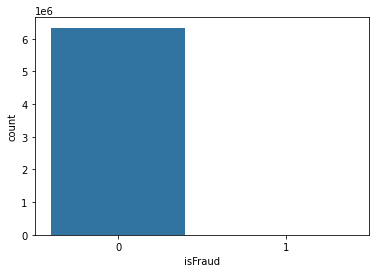

In [41]:
sns.countplot(x='isFraud',data=df)

jokes on me. I can't see anything with this visualization. lets shows by number.

In [42]:
df['isFraud'].value_counts()

0    6337537
1       8191
Name: isFraud, dtype: int64

In [43]:
genuine_percentage = df['isFraud'].value_counts()[0]/(len(df))
fraud_percentage = df['isFraud'].value_counts()[1]/(len(df))
d = {'Not Fraud': genuine_percentage, 'Fraud': fraud_percentage}
percentages = pd.DataFrame(data = d, index=[0])
percentages

,Not Fraud,Fraud
0,0.998709,0.001291


This very imbalance dataset. This mean every 774 transactions there is one fraud transactions. Lets learn about this fraud transaction. How many of this reciepents is unique account and does fraud transaction bold enough to return to transfered account into another account. First we must get fraud transaction only dataset.

In [44]:
fraudonly=df.loc[df['isFraud'] == 1]

fraudonly

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,C,M,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
2,1,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,1,0,0,0,0,0,1
3,1,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,1,0,0,1,0,0,0
251,1,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,1,0,0,0,0,0,1
252,1,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,1,0,0,1,0,0,0
680,1,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,1,0,0,1,0,0,0
6362616,743,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,1,0,0,0,0,0,1
6362617,743,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,1,0,0,1,0,0,0
6362618,743,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,1,0,0,0,0,0,1


In [45]:
print("total receipents account in fraud only dataset {}".format( fraudonly['nameDest'].nunique()))



total receipents account in fraud only dataset 8148


This mean 44 are duplicates account that were used as fraud account. we should mark this this rows as fraudaccount in whole dataset. we get into that later.

Are the receipents here make any transactional in this fraudonly dataset?

In [46]:
print(fraudonly[fraudonly.nameOrig.isin(fraudonly.nameDest)].nameOrig )

Series([], Name: nameOrig, dtype: object)


In [58]:
print(df[df.nameDest.isin(fraudonly.nameDest)].nameDest )

fraudaccountname=df[df.nameDest.isin(fraudonly.nameDest)].nameDest.tolist()

fcrtdf=df[df.nameDest.isin(fraudonly.nameDest)]
fcrtdf.describe()

2           C553264065
3            C38997010
24          C932583850
191         C932583850
251         C972765878
              ...     
6362615     C776919290
6362616    C1881841831
6362617    C1365125890
6362618    C2080388513
6362619     C873221189
Name: nameDest, Length: 65495, dtype: object


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,C,M,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
count,65495.000000,6.549500e+04,6.549500e+04,6.549500e+04,6.549500e+04,6.549500e+04,65495.000000,65495.0,65495.0,65495.000000,65495.000000,65495.000000,65495.0,65495.000000
mean,234.663806,4.392636e+05,1.351941e+06,1.204143e+06,2.310884e+06,2.597318e+06,0.125063,1.0,0.0,0.287472,0.517612,0.008596,0.0,0.186320
std,161.592224,1.234588e+06,3.602863e+06,3.509758e+06,5.332494e+06,5.696415e+06,0.330793,0.0,0.0,0.452587,0.499694,0.092316,0.0,0.389367
min,1.000000,1.201400e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
25%,133.000000,8.492105e+04,0.000000e+00,0.000000e+00,1.362269e+05,2.599433e+05,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
50%,214.000000,1.787130e+05,2.487200e+04,0.000000e+00,7.902282e+05,1.013892e+06,0.000000,1.0,0.0,0.000000,1.000000,0.000000,0.0,0.000000
75%,330.000000,3.307712e+05,4.304759e+05,2.076661e+05,2.652222e+06,3.021340e+06,0.000000,1.0,0.0,1.000000,1.000000,0.000000,0.0,0.000000
max,743.000000,6.423445e+07,5.958504e+07,4.958504e+07,2.362305e+08,2.367265e+08,1.000000,1.0,0.0,1.000000,1.000000,1.000000,0.0,1.000000


Some of this account were actually not detected as fraud. we will mark any receipents that did transactions to fraud account. Did those any those fraudaccount did make any transaction to other account?

In [59]:
print(df[df.nameOrig.isin(fraudonly.nameDest)].nameOrig )
fraudaccountmakingtransfer=df[df.nameOrig.isin(fraudonly.nameDest)].nameOrig.tolist()
fcmtdf=df[df.nameOrig.isin(fraudonly.nameDest)]
fcmtdf.describe()

343013     C1774310379
960304     C2086292862
1168398    C1023330867
1673806     C765607741
1772094     C991247178
2186261     C423543548
2238041    C1868986147
2499984     C979594589
2549465    C1969565765
2873970    C1779956771
2921898     C610496257
3536531     C248286792
3536868    C1757788418
3689826    C1673497915
4943620     C737489499
5203526    C2142717530
6149940    C1714931087
6150837     C915485442
Name: nameOrig, dtype: object


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,C,M,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
count,18.000000,18.000000,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,18.0,18.000000,18.000000,18.000000,18.000000,18.0,18.000000,18.000000
mean,242.000000,93648.910000,2.623068e+06,2.670592e+06,8.723502e+05,8.946099e+05,0.0,0.722222,0.277778,0.388889,0.277778,0.0,0.277778,0.055556
std,141.429259,120195.434413,5.138101e+06,5.144336e+06,1.439164e+06,1.500169e+06,0.0,0.460889,0.460889,0.501631,0.460889,0.0,0.460889,0.235702
min,16.000000,2266.880000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,167.750000,10771.635000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.250000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,216.500000,46862.225000,3.859700e+04,9.982075e+04,7.372104e+04,4.901121e+04,0.0,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,272.500000,124188.157500,3.594032e+05,4.021450e+05,1.610056e+06,1.792491e+06,0.0,1.000000,0.750000,1.000000,0.750000,0.0,0.750000,0.000000
max,546.000000,396920.340000,1.474988e+07,1.475367e+07,4.575180e+06,4.789736e+06,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


Interesting, some of this origin account (flagged as receipents of fraud account) did do some transactions. Lets mark those as well. Can we see the differences of ammount of transaction of this two?

In [60]:
FraudAccountMakingTransfer = fcrtdf['amount'].mean()
FraudAccountReceiveTransfer = fcmtdf['amount'].mean()
d = {'Average amount Fraud Account Making Transfer': FraudAccountMakingTransfer, 'Average amount Fraud Account Received Transfer': FraudAccountReceiveTransfer}
FraudAverageTransactions = pd.DataFrame(data = d, index=[0])
FraudAverageTransactions

,Average amount Fraud Account Making Transfer,Average amount Fraud Account Received Transfer
0,439263.559696,93648.91


This sneaky fraud did move the money around(large amount of money). We could do association from here on to learn which account belong to fraudster. So we can see what are the chain of fraud account. 

Feature Engineering.

Lets mark those account and see their correlations.

In [30]:
def cat(row,fraudaccountmakingtransfer):
    if row['nameOrig'] in fraudaccountmakingtransfer:
        return 1
    else:
        return 0

def cat2(row,fraudaccountname):
    if row['nameDest'] in fraudaccountname:
        return 1
    else:
        return 0
df["FraudAccountMakingTransaction"]=df.apply(lambda row: cat(row,fraudaccountmakingtransfer),axis = 1)
df["TransactionToFraudAccount"]=df.apply(lambda row : cat2(row,fraudaccountname), axis = 1)
        


In [31]:
df.to_csv("frauddataset.csv")

In [32]:
print(df)

         step      amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0           1     9839.64  C1231006815      170136.00       160296.36   
1           1     1864.28  C1666544295       21249.00        19384.72   
2           1      181.00  C1305486145         181.00            0.00   
3           1      181.00   C840083671         181.00            0.00   
4           1    11668.14  C2048537720       41554.00        29885.86   
...       ...         ...          ...            ...             ...   
6362615   743   339682.13   C786484425      339682.13            0.00   
6362616   743  6311409.28  C1529008245     6311409.28            0.00   
6362617   743  6311409.28  C1162922333     6311409.28            0.00   
6362618   743   850002.52  C1685995037      850002.52            0.00   
6362619   743   850002.52  C1280323807      850002.52            0.00   

            nameDest  oldbalanceDest  newbalanceDest  isFraud  C  M  CASH_IN  \
0        M1979787155            0.00       

In [33]:
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,C,M,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,FraudAccountMakingTransaction,TransactionToFraudAccount
step,1.000000,0.022379,-0.010064,-0.010305,0.027674,0.025896,0.031482,-0.005015,0.005015,0.004067,-0.012986,0.002864,0.005015,0.006913,-0.000017,-0.006265
amount,0.022379,1.000000,-0.002856,-0.007958,0.294071,0.459260,0.076786,0.197233,-0.197233,-0.009812,-0.004643,-0.023298,-0.197233,0.365831,-0.000241,0.043754
oldbalanceOrg,-0.010064,-0.002856,1.000000,0.998802,0.066156,0.041933,0.010179,0.189289,-0.189289,0.506699,-0.201207,-0.021378,-0.189289,-0.081703,0.001042,0.018250
newbalanceOrig,-0.010305,-0.007958,0.998802,1.000000,0.067724,0.041740,-0.008147,0.193718,-0.193718,0.527318,-0.211295,-0.021799,-0.193718,-0.087468,0.001044,0.012132
oldbalanceDest,0.027674,0.294071,0.066156,0.067724,1.000000,0.976564,-0.005900,0.231210,-0.231210,0.075926,0.085791,0.009260,-0.231210,0.130386,-0.000114,0.036310
newbalanceDest,0.025896,0.459260,0.041933,0.041740,0.976564,1.000000,0.000530,0.238066,-0.238066,0.034787,0.093235,0.006272,-0.238066,0.191618,-0.000152,0.038087
isFraud,0.031482,0.076786,0.010179,-0.008147,-0.005900,0.000530,1.000000,0.025644,-0.025644,-0.019096,0.011143,-0.002898,-0.025644,0.053926,-0.000060,0.351987
C,-0.005015,0.197233,0.189289,0.193718,0.231210,0.238066,0.025644,1.000000,-1.000000,0.379177,0.526033,0.057542,-1.000000,0.215909,0.000212,0.072856
M,0.005015,-0.197233,-0.189289,-0.193718,-0.231210,-0.238066,-0.025644,-1.000000,1.000000,-0.379177,-0.526033,-0.057542,1.000000,-0.215909,-0.000212,-0.072856
CASH_IN,0.004067,-0.009812,0.506699,0.527318,0.075926,0.034787,-0.019096,0.379177,-0.379177,1.000000,-0.391708,-0.042848,-0.379177,-0.160776,0.000685,0.016576


In [119]:
df=pd.read_csv("d:/Mini Project/Github/Fraud Transaction/frauddataset.csv")

In [120]:
df.drop('Unnamed: 0', axis=1 ,inplace = True)

In [121]:
#rearrange columns
df=df[['step', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest','C', 'M',
       'CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER',
       'FraudAccountMakingTransaction', 'TransactionToFraudAccount','isFraud']]

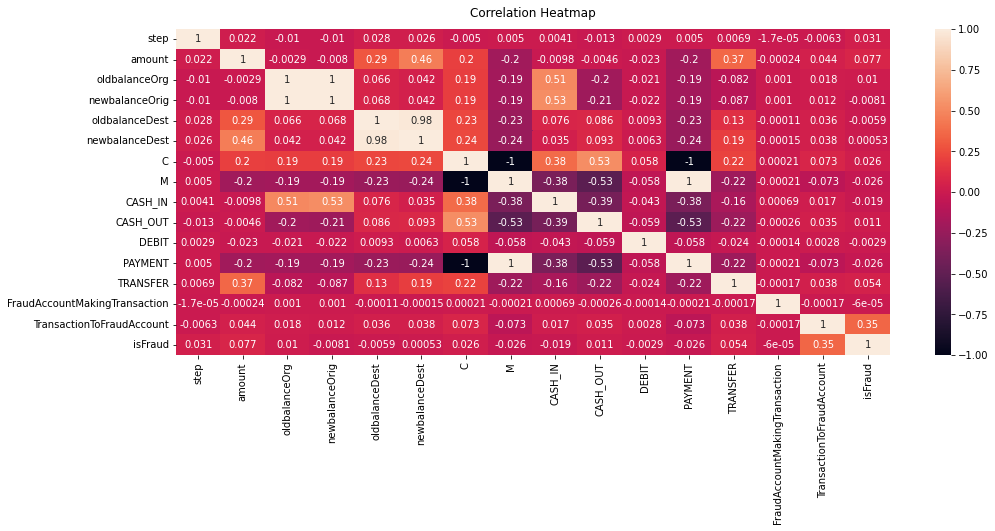

In [122]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Up to this point, we can rule out that the dataset comes in with variables that **need further analysis to see their correlation** to be categorized as fraud. This is mainly due to **severe imbalance dataset**. We know that fraud is **bold enough to make transactions repeatedly to fraud account** but comparing to **average transaction with non categorize fraud recipients account, the transaction is smaller**. We also learn that **recipients of transactions that flagged as fraud accounts did move the money around to non-flagged recipient fraud accounts, in a large sum of a transaction as well compared to the already flagged recipients**. It seems they become more **careful with flagged accounts as if they know it already caught a little bit of attention.(have awareness)** There is also shows that recipients of **fraud transaction usually is a customer type account and they avoid merchant type account**. We can also see the **highest correlated is Transaction to Fraud Account (because we flagged on the condition of that)** and the **lowest would be FraudAccountMakingTransaction as they make a huge amount of transaction undetected**. There is one thing I wish to explore - **to learn the relationship of origin type of customer to fraud account** . Probably there will be part two. More on that later.

What I can suggest improving this dataset is launch investigation towards those accounts that move money from fraud accounts to non-flagged transactions. Aside from that, a step (represents as an hour) should be described in time such as AM or PM so we can learn when this transaction is usually made. It will be more beneficial to learn when the transaction is usually done whether on Weekends or Weekdays. It is good to learn how much large the money that moves around based on this period based analysis.

Can we do the model out of this? meh more information, the merrier it is.Considering that this dataset severly imbalance, probably we can try to minimize the problem. But for now, let's try to create the model. Us vs Imbalance Dataset.

**Model Development**

Lets remove the unnecessary column such as step and accounts number

In [123]:
X=df[['amount','oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'C', 'M', 'CASH_IN', 'CASH_OUT',
       'DEBIT', 'PAYMENT', 'TRANSFER', 'FraudAccountMakingTransaction',
       'TransactionToFraudAccount']]
y=df['isFraud']

Lets use stratified sampling, allowing the both of training and test set have equally distributed class at least.

In [124]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42, stratify=y)

scaled it down x variables with classical minmax

In [125]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

lets use some simple binary classifier like logistic regression

In [126]:
###We import the model that will be used. from sklearn.linear_model import LogisticRegression. 
# Create an instance of the model. 
logreg = LogisticRegression() 
# Training the model. 
logreg.fit(X_train_scaled,y_train) 
# Do prediction. 
y_pred=logreg.predict(X_test_scaled)

In [127]:
from sklearn import metrics 
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[2093902,      82],
       [   2058,     646]], dtype=int64)

In [128]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9989793426585166


her her, well what we expect from severly imbalance dataset. But what about other metrics? we can focus on some other metrics such as recall. With recall basically we want to see how well when the actual transaction is fraud, it predicted as fraud as well. Above shows little overall classification report. See the below

In [129]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2093984
           1       0.89      0.24      0.38      2704

    accuracy                           1.00   2096688
   macro avg       0.94      0.62      0.69   2096688
weighted avg       1.00      1.00      1.00   2096688



When it comes to actual fraud transaction, it perform really bad. Is there anything we can increase it? like tuning the model until it reach better recall metrics? We can actually. And in fact we can automate all the process as well! using the pycaret

In [130]:
data=df.drop(['step','nameOrig','nameDest'], axis=1)

In [131]:
train, test = train_test_split(data, random_state =42 , test_size = 0.33)

In [132]:
setup_df = setup(data= train, target = 'isFraud', data_split_stratify=True)

,Description,Value
0,session_id,8789
1,Target,isFraud
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(4256911, 15)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
models=compare_models(sort='Recall')

IntProgress(value=0, description='Processing: ', max=69)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:14:10
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,K Neighbors Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9987,0.5306,0.0293,0.2069,0.0497,0.0496,0.0726,4.6610
